<a href="https://colab.research.google.com/github/thianalexis/proyectoTaller2/blob/main/taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TRABAJO SEMANA 2**


## ETAPA 1. ENTENDIMIENTO DE LOS DATOS



Los datos de precios de viviendas de Boston de Harrison, D. y Rubinfeld, D.L. en 'Precios hedónicos y la demanda de aire limpio', J. Economía y Gestión Ambiental, vol.5, 81-102, 1978.

Se tiene la siguientes variables

Variables en orden:

CRIM: tasa de crimen per cápita por ciudad

ZN: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados

INDUS: proporción de acres de negocios no minoristas por ciudad

CHAS: variable ficticia del río Charles (= 1 si el área limita con el río; 0 en caso contrario)

NOX: concentración de óxidos de nitrógeno (partes por 10 millones)

RM: número promedio de habitaciones por vivienda

AGE: proporción de unidades ocupadas por el propietario construidas antes de 1940

DIS: distancias ponderadas a cinco centros de empleo de Boston

RAD: índice de accesibilidad a autopistas radiales

TAX: tasa de impuesto a la propiedad de valor total por $10,000

PTRATIO: proporción alumno-maestro por ciudad

B: 1000(Bk - 0.63)^2 donde Bk es la proporción de población negra por ciudad
LSTAT: % de estatus más bajo de la población

MEDV: Valor mediano de hogares ocupados por el propietario en $1000's

Para el ejercicio se elimina la variable B, dado que esta variable no invertible "B" que se asumió que tenía un impacto positivo en los precios de las casas basado en la segregación racial. Además, el objetivo original del conjunto de datos era estudiar el impacto de la calidad del aire, pero no se demostró adecuadamente la validez de esta suposición.

In [ ]:
import pandas as pd
import requests
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

# Leer los datos
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Seleccionar solo las filas necesarias y combinarlas
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

# Seleccionar la variable objetivo
target = raw_df.values[1::2, 2]

# Definir los nombres de las columnas
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Crear el DataFrame con los datos y las columnas adecuadas
df = pd.DataFrame(data, columns=column_names[:-1])  # Excluir la columna MEDV
df['MEDV'] = target  # Añadir la columna MEDV como la variable objetivo

# Mostrar las primeras filas del DataFrame
print(df.head())



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
df.shape # en el dataset contamos con 506 filas y 14 columnas

(506, 14)

In [ ]:
df.dtypes #Nos indica que estamos trabajo con variables cuantitativas continuas

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Este reporte describe estadísticas descriptivas para cada variable en un conjunto de datos. Aquí hay una interpretación corta para las variables

CRIM: La tasa de crimen per cápita en las ciudades tiene una media de aproximadamente 3.61, con una desviación estándar de aproximadamente 8.60. Los valores varían desde muy bajos (mínimo de 0.006) hasta muy altos (máximo de 88.976).

ZN: La proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados tiene una media de aproximadamente 11.36, con una desviación estándar de aproximadamente 23.32. Hay una gran variabilidad en los datos, con valores que van desde 0 hasta 100.

INDUS: La proporción de acres de negocios no minoristas por ciudad tiene una media de aproximadamente 11.14, con una desviación estándar de aproximadamente 6.86. Los valores varían desde 0.46 hasta 27.74.

CHAS: La variable ficticia del río Charles indica que alrededor del 6.9% de las áreas en el conjunto de datos limitan con el río Charles, ya que la media es de aproximadamente 0.069.

NOX: La concentración de óxidos de nitrógeno tiene una media de aproximadamente 0.55 partes por 10 millones, con una desviación estándar de aproximadamente 0.12. Los valores oscilan entre 0.385 y 0.871.

RM: El número promedio de habitaciones por vivienda tiene una media de aproximadamente 6.28, con una desviación estándar de aproximadamente 0.70. Los valores varían desde 3.56 hasta 8.78.

AGE: La proporción de unidades ocupadas por el propietario construidas antes de 1940 tiene una media de aproximadamente 68.57, con una desviación estándar de aproximadamente 28.15. Los datos abarcan desde 2.9 hasta 100 años de antigüedad.

DIS: Las distancias ponderadas a cinco centros de empleo de Boston tienen una media de aproximadamente 3.80, con una desviación estándar de aproximadamente 2.11. Las distancias varían desde 1.13 hasta 12.13.

RAD: El índice de accesibilidad a autopistas radiales tiene una media de aproximadamente 9.55, con una desviación estándar de aproximadamente 8.71. Los valores oscilan entre 1 y 24.

TAX: La tasa de impuesto a la propiedad tiene una media de aproximadamente 408.24, con una desviación estándar de aproximadamente 168.54. Los valores varían desde 187 hasta 711.

PTRATIO: La proporción alumno-maestro tiene una media de aproximadamente 18.46, con una desviación estándar de aproximadamente 2.16. Las proporciones varían desde 12.6 hasta 22.

B: La variable B tiene una media de aproximadamente 356.67, con una desviación estándar de aproximadamente 91.29. Los valores varían desde 0.32 hasta 396.9.

LSTAT: El % de estatus más bajo de la población tiene una media de aproximadamente 12.65, con una desviación estándar de aproximadamente 7.14. Los porcentajes varían desde 1.73 hasta 37.97.

MEDV: El valor mediano de hogares ocupados por el propietario en $1000's tiene una media de aproximadamente 22.53, con una desviación estándar de aproximadamente 9.20. Los valores oscilan entre 5 y 50.


Los cuartiles dividen un conjunto de datos en cuatro partes iguales:

Q1 es el valor por debajo del cual se encuentra el 25% de los datos.
Q2 es la mediana, divide los datos en dos partes iguales.
Q3 es el valor por debajo del cual se encuentra el 75% de los datos.


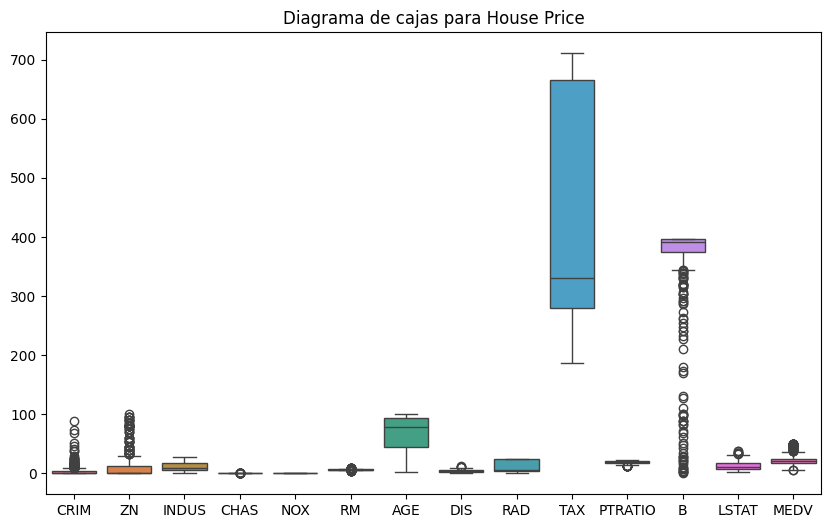

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Diagrama de cajas para House Price')
plt.show()

En el diagrama de cajas se muestra la distribución para las respectivas variables, se observa que algunas variables presentan datos atipicos y distribuciones asimétricas.

<ipython-input-10-5bef5313114b>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


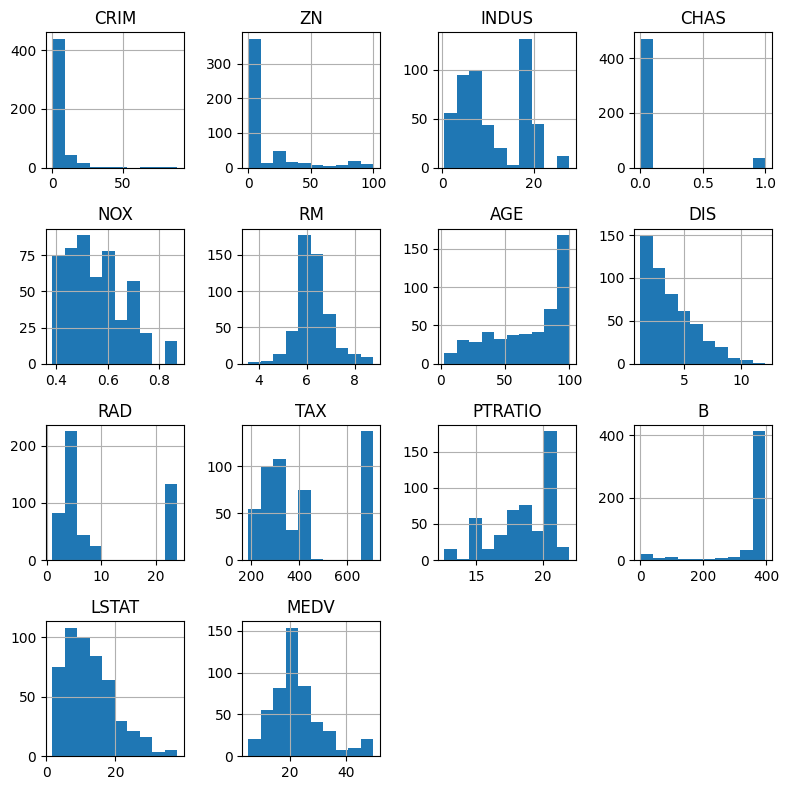

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
df.hist(ax=ax)
plt.tight_layout()
plt.show()

#Para las variables cuantitavias continuas, se muestra los respectivos histogramas
#Se muestran los respectivos histogramas de frecuencias para las variables

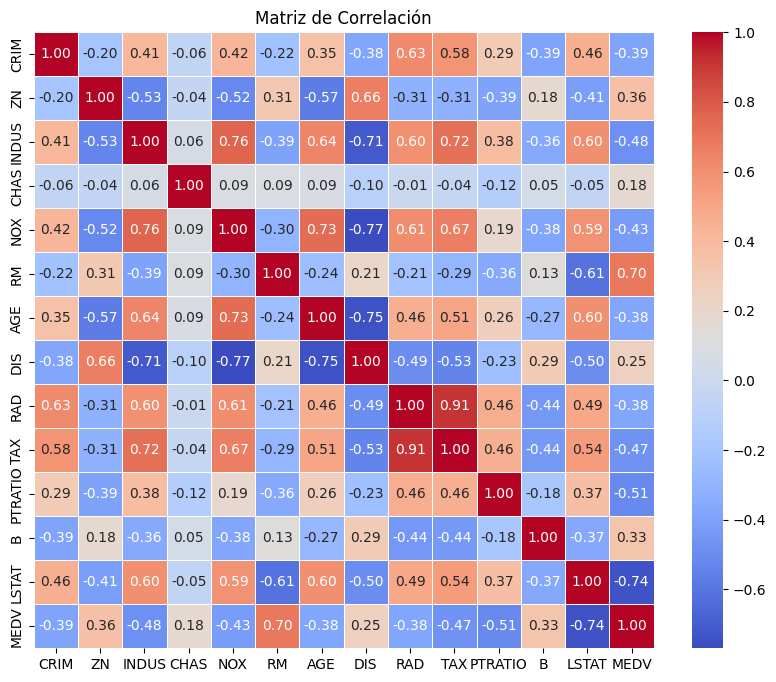

In [ ]:
matriz_correlacion = df.corr()

# Crear un mapa de calor con seaborn para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

En la matriz de correlación se puede observar el grado de fuerza de relacion en las variables del modelo que vamos a construir. Por ejemplo la variable MEDV tiene una fuerte correlación y positiva con la variable RM, por otro lado tiene una fuerte relación y negativa con la variable 0.74, esto podría indicar que estas variables pueden ser potenciales para el modelo. Por otro lado con las demás variables se tiene que la relación es débil. También la matriz muestra la correlación en entre las variables features, esto nos podria ayudar para detectar problemas de multicolinealidad.

## ETAPA 2. PREPARACIÓN DE LOS DATOS

In [ ]:
df.info()

#Observamos si el dataset tiene valores nulos, para el ejercicio se tiene que no se cuentan con valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Dado que el dataset no tiene información con valores nulos o de acuerdo con la fuente de información datos que se deban cambiar, se procede a pasar a la etapa de modelado.

## ETAPA 3. MODELADO

# MATRIZ DE CARACTERÍSTICAS

Error cuadrático medio: 24.291119474973478
Coeficiente de determinación (R2): 0.6687594935356326


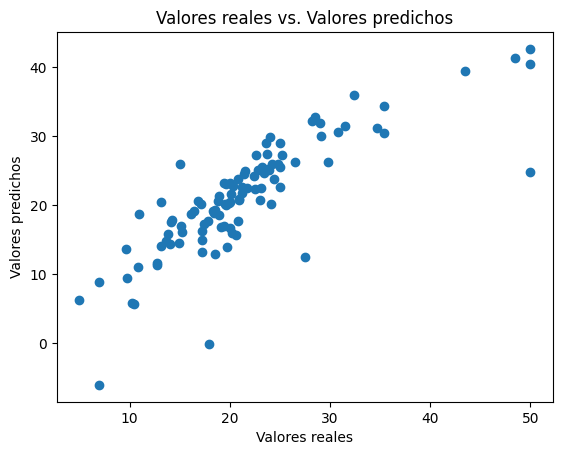

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Definimos las variables del modelo

X = df.drop('MEDV', axis=1)  # Características
y = df['MEDV']  # Variable objetivo

# Dividimos los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos y entrenamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecimos los valores de MEDV para el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R2):", r2)

# Graficar los valores reales vs. los valores predichos
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs. Valores predichos")
plt.show()


# MÉTODOS DE ESCALADO

Estandarización:
Error cuadrático medio: 24.291119474973513
Coeficiente de determinación (R2): 0.668759493535632


Escalado mínimo-máximo:
Error cuadrático medio: 24.291119474973502
Coeficiente de determinación (R2): 0.6687594935356322


Escalado robusto:
Error cuadrático medio: 24.291119474973517
Coeficiente de determinación (R2): 0.668759493535632


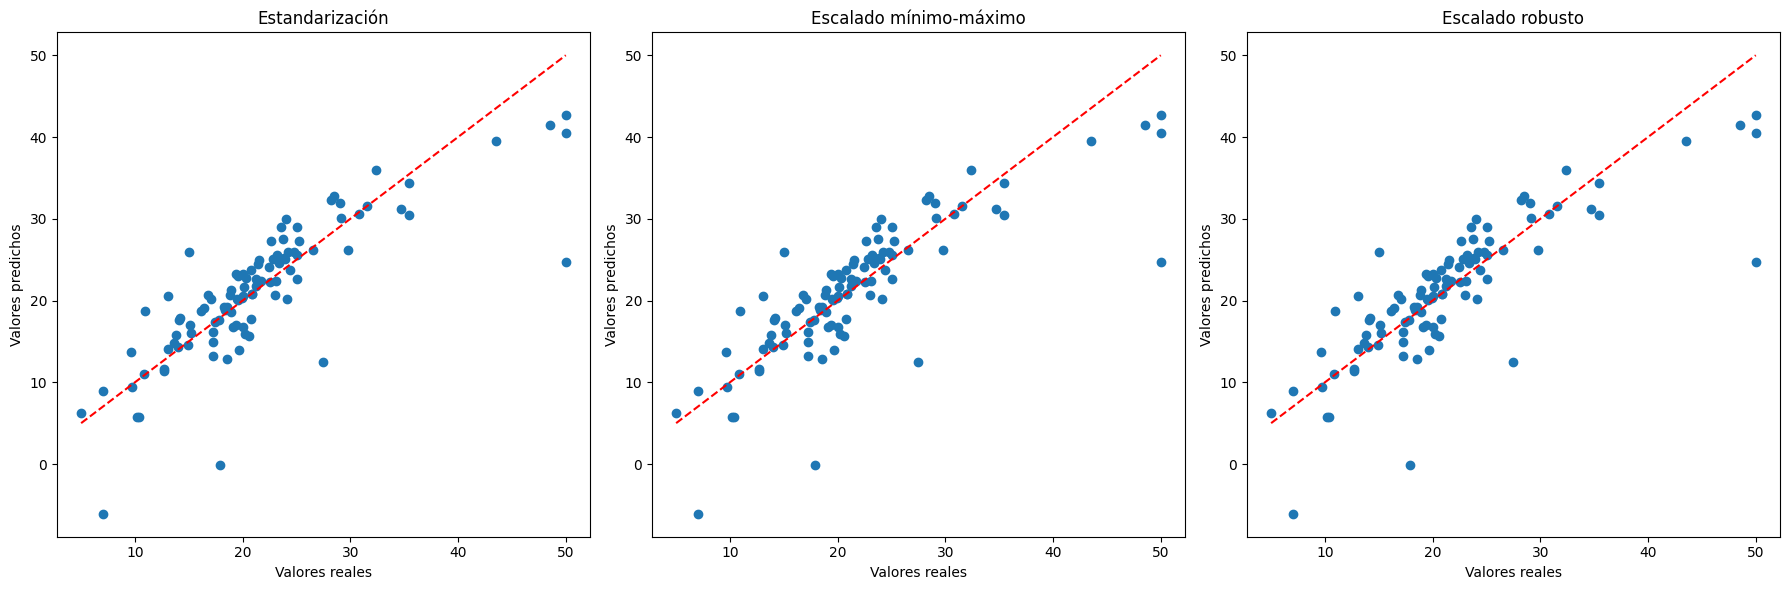

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Dividimos los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos los objetos de escalado para cada método
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

# Escalamos las características utilizando cada método
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

# Entrenar¿mos un modelo de regresión lineal con cada conjunto de características escaladas
model_standard = LinearRegression()
model_standard.fit(X_train_standard, y_train)

model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train)

model_robust = LinearRegression()
model_robust.fit(X_train_robust, y_train)

# Predecimos los valores de MEDV para el conjunto de prueba con cada modelo
y_pred_standard = model_standard.predict(X_test_standard)
y_pred_minmax = model_minmax.predict(X_test_minmax)
y_pred_robust = model_robust.predict(X_test_robust)

# Calcular el error cuadrático medio y el coeficiente de determinación (R^2) para cada modelo
mse_standard = mean_squared_error(y_test, y_pred_standard)
r2_standard = r2_score(y_test, y_pred_standard)

mse_minmax = mean_squared_error(y_test, y_pred_minmax)
r2_minmax = r2_score(y_test, y_pred_minmax)

mse_robust = mean_squared_error(y_test, y_pred_robust)
r2_robust = r2_score(y_test, y_pred_robust)

# Imprimir los resultados
print("Estandarización:")
print("Error cuadrático medio:", mse_standard)
print("Coeficiente de determinación (R2):", r2_standard)
print("\n")

print("Escalado mínimo-máximo:")
print("Error cuadrático medio:", mse_minmax)
print("Coeficiente de determinación (R2):", r2_minmax)
print("\n")

print("Escalado robusto:")
print("Error cuadrático medio:", mse_robust)
print("Coeficiente de determinación (R2):", r2_robust)

import matplotlib.pyplot as plt

# Graficar valores reales vs. valores predichos para cada método de escalado
plt.figure(figsize=(18, 6))

# Estandarización
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_standard)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Estandarización")

# Escalado mínimo-máximo
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_minmax)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Escalado mínimo-máximo")

# Escalado robusto
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_robust)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Escalado robusto")

plt.tight_layout()
plt.show()



Los tres metodos de escalado proporcionan resultados similares en terminos de precisión de predicción para el modelo de regresión lineal en este conjunto de datos. Por tanto, elección del método de escalado puede no tener un impacto significativo en el rendimiento del modelo.

# COMPONENTES PRINCIPALES

Error cuadrático medio (MSE) del modelo con PCA: 55.017344476813555
Coeficiente de determinación (R2) del modelo con PCA: 0.24976808633295033


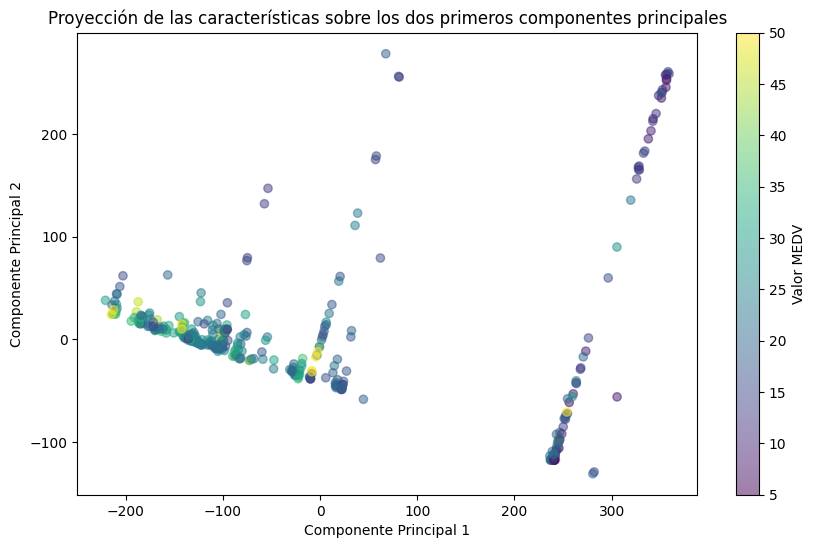

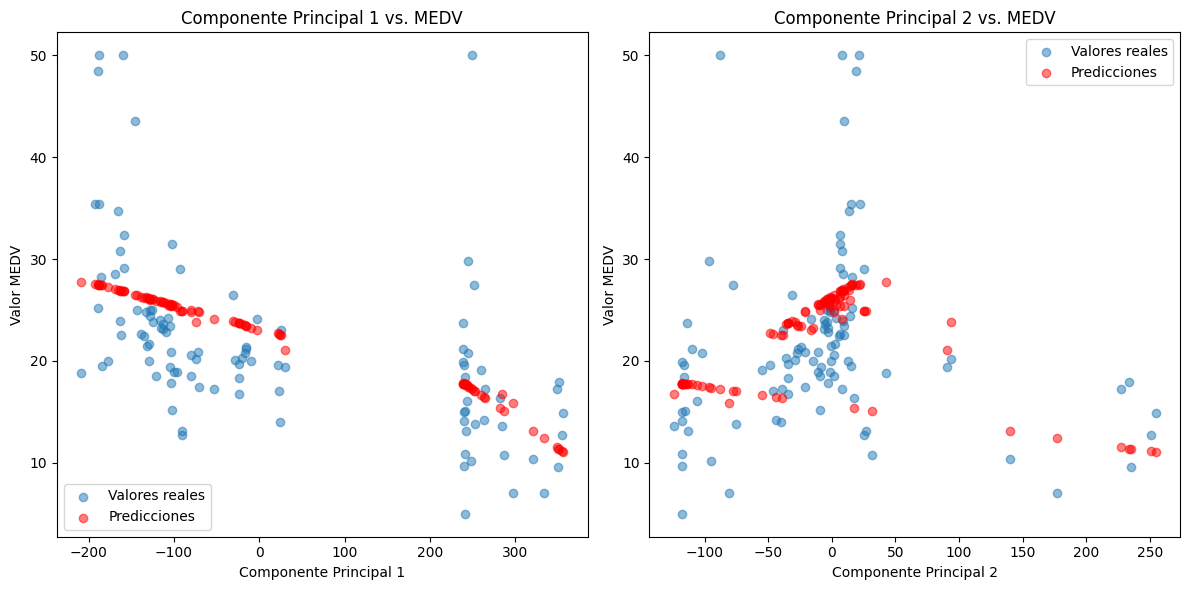

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Inicializamos y ajustar PCA para reducir las características a dos componentes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenamos un modelo de regresión lineal con las características proyectadas sobre los dos primeros componentes principales
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Predecimos los valores de MEDV para el conjunto de prueba
y_pred = model.predict(X_test_pca)

# Calculamos el error cuadrático medio y el coeficiente de determinación (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostramos los errores asociados al modelo
print("Error cuadrático medio (MSE) del modelo con PCA:", mse)
print("Coeficiente de determinación (R2) del modelo con PCA:", r2)

# Gráfico de dispersión de las dos primeras componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Valor MEDV')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de las características sobre los dos primeros componentes principales')
plt.show()

# Gráfico de dispersión de las componentes principales vs. MEDV en el conjunto de prueba
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], y_test, alpha=0.5, label='Valores reales')
plt.scatter(X_test_pca[:, 0], y_pred, color='red', alpha=0.5, label='Predicciones')
plt.xlabel('Componente Principal 1')
plt.ylabel('Valor MEDV')
plt.title('Componente Principal 1 vs. MEDV')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 1], y_test, alpha=0.5, label='Valores reales')
plt.scatter(X_test_pca[:, 1], y_pred, color='red', alpha=0.5, label='Predicciones')
plt.xlabel('Componente Principal 2')
plt.ylabel('Valor MEDV')
plt.title('Componente Principal 2 vs. MEDV')
plt.legend()

plt.tight_layout()
plt.show()

#Para el modelo, tenemos que el coeficiente de determinación es tan sólo del 24,97 %

# BINNING

Error cuadrático medio (MSE) con binning y características de interacción: 20.495963147521078
Coeficiente de determinación (R2) con binning y características de interacción: 0.720511307827763


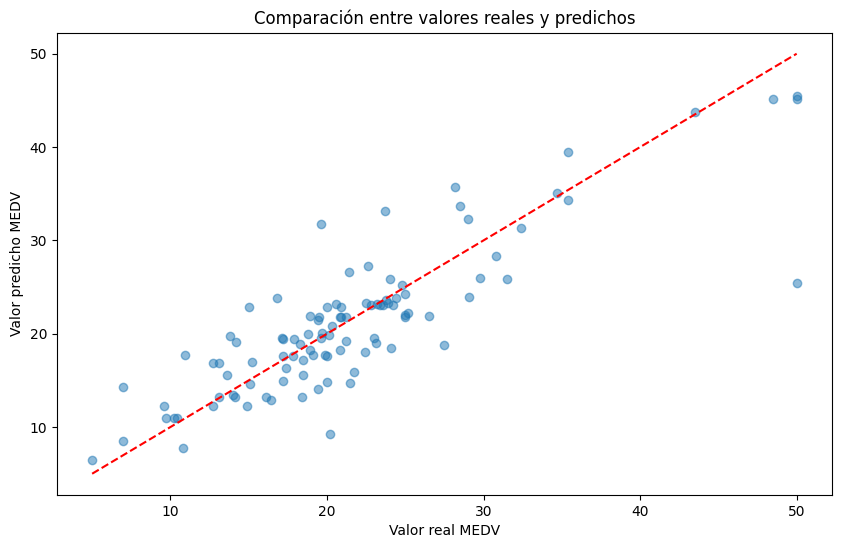

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Dividimos los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binning para características continuas
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_binned = kbins.fit_transform(X_train.select_dtypes(include=['float64']))
X_test_binned = kbins.transform(X_test.select_dtypes(include=['float64']))

# Características de interacción
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_binned)
X_test_poly = poly.transform(X_test_binned)

# Entrenamos un modelo de regresión lineal con las nuevas características
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predecimos los valores de MEDV para el conjunto de prueba
y_pred = model.predict(X_test_poly)

# Calcular el error cuadrático medio y el coeficiente de determinación (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los errores asociados al modelo
print("Error cuadrático medio (MSE) con binning y características de interacción:", mse)
print("Coeficiente de determinación (R2) con binning y características de interacción:", r2)

# Gráficos de comparación entre valores reales y predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valor real MEDV')
plt.ylabel('Valor predicho MEDV')
plt.title('Comparación entre valores reales y predichos')
plt.show()


# CARACTERÍSTICAS POLINÓMICAS

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Definir X y y (características y variable objetivo)
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar listas para almacenar los errores
mse_scores = []
r2_scores = []

# Probar cada grado polinómico entre 2 y 5
for grado in range(2, 6):
    # Crear características polinómicas para el grado actual
    poly_features = PolynomialFeatures(degree=grado)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Entrenar modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_poly_test)

    # Calcular errores
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Almacenar los errores
    mse_scores.append(mse)
    r2_scores.append(r2)

# Mostrar los resultados
for grado, mse, r2 in zip(range(2, 6), mse_scores, r2_scores):
    print(f"Grado polinómico: {grado}, MSE: {mse}, R2: {r2}")


Grado polinómico: 2, MSE: 14.56643599827278, R2: 0.8013680002512961
Grado polinómico: 3, MSE: 129848.06900375504, R2: -1769.6446252729122
Grado polinómico: 4, MSE: 5417.537049581197, R2: -72.87505207166701
Grado polinómico: 5, MSE: 5137.572444741931, R2: -69.05737633240773



El modelo polinómico de grado 2 mostró un desempeño notablemente superior en comparación con los modelos de grados más altos. Esto se refleja en el error cuadrático medio (MSE) más bajo y en el coeficiente de determinación (R2) más alto.

El R2 de 0.80 significa que alrededor del 80% de la variabilidad en la variable objetivo (MEDV) puede ser explicada por el modelo. Un R2 cercano a 1 indica un buen ajuste del modelo a los datos, lo que sugiere que el modelo de grado 2 puede capturar de manera efectiva la relación entre las features y la variable objetivo.